In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from prophet import Prophet

In [3]:
df=pd.read_csv("/content/drive/MyDrive/All_months/top_50_products.csv")

In [4]:
df = df[['Date', 'product_code_or_sku', 'qty_sold']]

In [5]:
df.head()

,Date,product_code_or_sku,qty_sold
0,2021-07-01,NLE5CO_55300_20,0
1,2021-07-01,NLE5AS_335CL_C24,0
2,2021-07-01,NLE5UM_6150,0
3,2021-07-01,NLE5SP_5DT_SC,2
4,2021-07-01,NLE5SP_6DBK_24,0


In [6]:
lines = df['product_code_or_sku'].unique()

In [7]:
lines

array(['NLE5CO_55300_20', 'NLE5AS_335CL_C24', 'NLE5UM_6150',
       'NLE5SP_5DT_SC', 'NLE5SP_6DBK_24', 'NLE5SP_6DBK_48SS',
       'NLE5SP_6DBK_AD', 'NLE5SP_6DBK_E45', 'NLE5SP_6DBK_DS',
       'NLE5SP_6DBK_E90', 'NLE5SP_6DP_36SSCF', 'NLE5SP_6DT_FC',
       'NLE5SP_6DT_F6', 'NLE5SP_6DT_CS11', 'NLE5SP_6DVL_E45',
       'NLE5SP_6DVL_ADWD', 'NLE5SP_6DVL_ADT', 'NLE5SP_6DVL_AD',
       'NLE5SP_6DVL_48', 'NLE5SP_6DVL_46TA', 'NLE5SP_6DP_SC',
       'NLE5SP_6DT_36SS', 'NLE5SP_6DP_XRB', 'NLE5SP_6DP_VC',
       'NLE5SB_36072M', 'NLE5SP_6DVL_ADC', 'NLE5SP_6DT_VC',
       'NLE5SP_6DT_LB', 'NLE5SB_36048M', 'NLE5IM_BM0110', 'NLE5SP_5DT_SA',
       'NLE5SP_6DBK_TL', 'NLE5SP_8DBK_48SS', 'NLE5SP_6DVL_68TA',
       'ROUTEINS', 'NLE5SP_6DT_48SS', 'NLE5SP_6DT_60CF', 'NLE5SP_6DBK_48',
       'NLE5SP_6DT_XRS', 'NLE5SP_8DT_VC', 'NLE5CF_LGL', 'NLE5RU_100S',
       'NLE5SE_6UT_48', 'NLE5SA_8116', 'NLE5SA_8115', 'NLE5RU_97S',
       'NLE5SC_SUPERCEDAR', 'NLE5NC_1443', 'SFTEYSG1000025645',
       'NLE5SP_6DT_60SSC

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_scores = {}
fit_models = {}
rmse_list = []

for stock_line in lines:
    frame = df[df['product_code_or_sku'] == stock_line].copy()
    frame.drop('product_code_or_sku', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    frame['ds'] = pd.to_datetime(frame['ds'])
    train_size = int(len(frame) * 0.8)
    train = frame[:train_size]
    test = frame[train_size:]
    m = Prophet(daily_seasonality=True, interval_width=0.95)
    m.fit(train)
    fit_models[stock_line] = m

    future = m.make_future_dataframe(periods=len(test), freq='D')
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].merge(test, on='ds', how='left')
    forecast = forecast.dropna(subset=['y', 'yhat'])

    if not forecast.empty:
        mse = mean_squared_error(forecast['y'], forecast['yhat'])
        rmse = np.sqrt(mse)
        mse_scores[stock_line] = mse
        rmse_list.append(rmse)
    else:
        mse_scores[stock_line] = float('nan')
        rmse_list.append(float('nan'))

mean_rmse = np.nanmean(rmse_list)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe97b7ly/vuok1g_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe97b7ly/2tqvcjvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34989', 'data', 'file=/tmp/tmpoe97b7ly/vuok1g_0.json', 'init=/tmp/tmpoe97b7ly/2tqvcjvk.json', 'output', 'file=/tmp/tmpoe97b7ly/prophet_modelc889ezrq/prophet_model-20240822054530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe97b7ly/xm15w442.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe97b7ly/fpke9w9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [9]:
print(f"Mean RMSE for all products: {mean_rmse}")

Mean RMSE for all products: 4.32808333641709


In [11]:
for stock_line, mse in mse_scores.items():
    print(f'MSE for product {stock_line}: {mse}')

MSE for product NLE5CO_55300_20: 15.906961523099733
MSE for product NLE5AS_335CL_C24: 125.63810801074875
MSE for product NLE5UM_6150: 181.84250808660187
MSE for product NLE5SP_5DT_SC: 6.849408983981325
MSE for product NLE5SP_6DBK_24: 1.6853451603242857
MSE for product NLE5SP_6DBK_48SS: 6.915365888859939
MSE for product NLE5SP_6DBK_AD: 0.8352896016536413
MSE for product NLE5SP_6DBK_E45: 1.7872087050350531
MSE for product NLE5SP_6DBK_DS: 0.5392677207392916
MSE for product NLE5SP_6DBK_E90: 0.9222042575638454
MSE for product NLE5SP_6DP_36SSCF: 3.2606035183216275
MSE for product NLE5SP_6DT_FC: 1.254071194953555
MSE for product NLE5SP_6DT_F6: 2.029492266181008
MSE for product NLE5SP_6DT_CS11: 0.9104632579011313
MSE for product NLE5SP_6DVL_E45: 1.6251012509424678
MSE for product NLE5SP_6DVL_ADWD: 1.0469971695783964
MSE for product NLE5SP_6DVL_ADT: 0.9603356410517528
MSE for product NLE5SP_6DVL_AD: 0.891068931680499
MSE for product NLE5SP_6DVL_48: 1.6138875601639626
MSE for product NLE5SP_6DVL

In [12]:
fit_models

{'NLE5CO_55300_20': <prophet.forecaster.Prophet at 0x7ee58d386500>,
 'NLE5AS_335CL_C24': <prophet.forecaster.Prophet at 0x7ee547819990>,
 'NLE5UM_6150': <prophet.forecaster.Prophet at 0x7ee547872350>,
 'NLE5SP_5DT_SC': <prophet.forecaster.Prophet at 0x7ee547870280>,
 'NLE5SP_6DBK_24': <prophet.forecaster.Prophet at 0x7ee58d386920>,
 'NLE5SP_6DBK_48SS': <prophet.forecaster.Prophet at 0x7ee547871570>,
 'NLE5SP_6DBK_AD': <prophet.forecaster.Prophet at 0x7ee54781bfa0>,
 'NLE5SP_6DBK_E45': <prophet.forecaster.Prophet at 0x7ee547872290>,
 'NLE5SP_6DBK_DS': <prophet.forecaster.Prophet at 0x7ee5475daf80>,
 'NLE5SP_6DBK_E90': <prophet.forecaster.Prophet at 0x7ee5478707c0>,
 'NLE5SP_6DP_36SSCF': <prophet.forecaster.Prophet at 0x7ee54763dd20>,
 'NLE5SP_6DT_FC': <prophet.forecaster.Prophet at 0x7ee54763fd60>,
 'NLE5SP_6DT_F6': <prophet.forecaster.Prophet at 0x7ee54763edd0>,
 'NLE5SP_6DT_CS11': <prophet.forecaster.Prophet at 0x7ee547671240>,
 'NLE5SP_6DVL_E45': <prophet.forecaster.Prophet at 0x7ee5

In [13]:
forward = fit_models['NLE5SP_6DT_CS11'].make_future_dataframe(periods=400, freq='D')
forecast = fit_models['NLE5SP_6DT_CS11'].predict(forward)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,0.271499,-1.492049,2.768344,0.271499,0.271499,0.314542,0.314542,0.314542,1.08643,...,0.050436,0.050436,0.050436,-0.822325,-0.822325,-0.822325,0.0,0.0,0.0,0.586041
1,2021-07-02,0.270088,-1.423577,2.778082,0.270088,0.270088,0.408516,0.408516,0.408516,1.08643,...,0.135197,0.135197,0.135197,-0.813112,-0.813112,-0.813112,0.0,0.0,0.0,0.678604
2,2021-07-03,0.268677,-2.228566,2.193506,0.268677,0.268677,-0.251419,-0.251419,-0.251419,1.08643,...,-0.537831,-0.537831,-0.537831,-0.800018,-0.800018,-0.800018,0.0,0.0,0.0,0.017258
3,2021-07-04,0.267266,-1.734364,2.440929,0.267266,0.267266,-0.032564,-0.032564,-0.032564,1.08643,...,-0.335904,-0.335904,-0.335904,-0.783090,-0.783090,-0.783090,0.0,0.0,0.0,0.234702
4,2021-07-05,0.265855,-1.163251,3.186792,0.265855,0.265855,0.705572,0.705572,0.705572,1.08643,...,0.381609,0.381609,0.381609,-0.762468,-0.762468,-0.762468,0.0,0.0,0.0,0.971427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2025-01-12,0.717429,-0.027745,4.041447,0.469938,0.955360,1.243567,1.243567,1.243567,1.08643,...,-0.335904,-0.335904,-0.335904,0.493041,0.493041,0.493041,0.0,0.0,0.0,1.960996
1292,2025-01-13,0.718788,0.720744,4.829305,0.470494,0.957997,1.959579,1.959579,1.959579,1.08643,...,0.381609,0.381609,0.381609,0.491540,0.491540,0.491540,0.0,0.0,0.0,2.678368
1293,2025-01-14,0.720148,0.177864,4.430914,0.471050,0.960634,1.688123,1.688123,1.688123,1.08643,...,0.114786,0.114786,0.114786,0.486907,0.486907,0.486907,0.0,0.0,0.0,2.408271
1294,2025-01-15,0.721507,0.336350,4.459672,0.471605,0.962672,1.756912,1.756912,1.756912,1.08643,...,0.191706,0.191706,0.191706,0.478775,0.478775,0.478775,0.0,0.0,0.0,2.478419


In [15]:
forecast[['ds','yhat']]

,ds,yhat
0,2021-07-01,0.586041
1,2021-07-02,0.678604
2,2021-07-03,0.017258
3,2021-07-04,0.234702
4,2021-07-05,0.971427
...,...,...
1291,2025-01-12,1.960996
1292,2025-01-13,2.678368
1293,2025-01-14,2.408271
1294,2025-01-15,2.478419


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


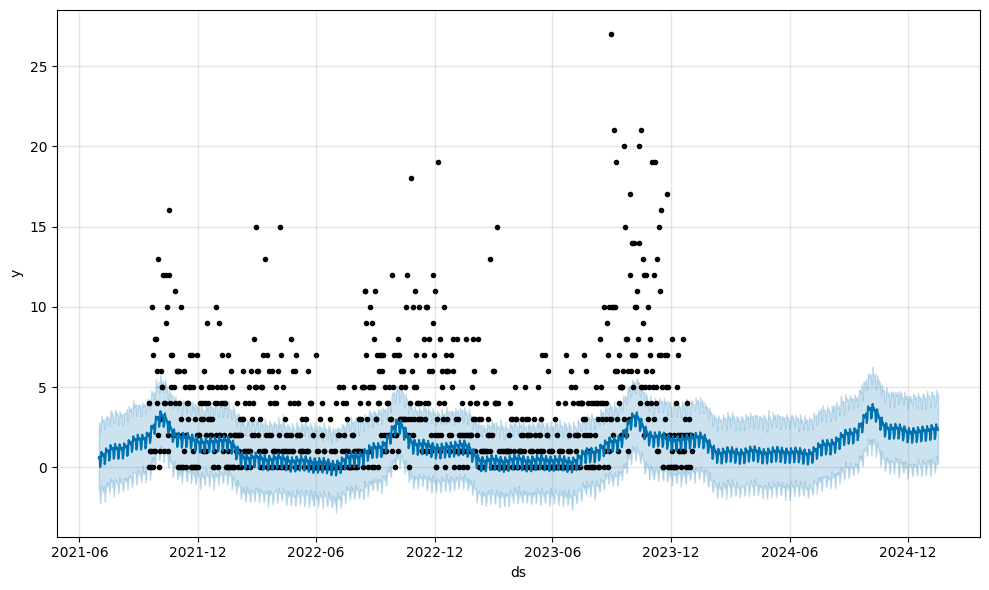

In [16]:
plot1 = m.plot(forecast)